In [193]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from torch.nn import functional as F

from openai import OpenAI
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [162]:
client = OpenAI()

def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [137]:
# Load tokenizer and model
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_embedding(text):
    """
    Gets the embedding for a text string using a Hugging Face transformer model.

    Args:
        text (str): The input text.
        model_name (str, optional): The name of the Hugging Face model. 
                                   Defaults to "bert-base-uncased".

    Returns:
        torch.Tensor: The embedding as a PyTorch tensor.
    """

    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get model output (hidden states)
    with torch.no_grad():  # No need to track gradients for inference
        outputs = model(**inputs)

    # Choose a suitable embedding representation (e.g., last hidden state, mean pooling)
    # Here, we'll use the last hidden state of the [CLS] token as the embedding
    embedding = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding

    return embedding

In [172]:
with open('dataframe2.pkl', 'rb') as file:
    df = pickle.load(file)

In [138]:
with open('bert_embedded.pkl', 'rb') as file:
    df = pickle.load(file)

In [173]:
vector = get_embedding('What are the incentives for installing solar on residential buildings? Single family homeowner in Santa Clara county with single filer')

In [174]:
X = np.vstack([np.vstack(df['embedding']), vector])

In [206]:
df['similarities'] = cosine_similarity(np.array(vector).reshape(1, -1), np.vstack(df['embedding'])).squeeze()

In [207]:
df['similarities']

lawCode=CCP&division=&title=10.&part=2.&chapter=7.&article=10.      0.694623
lawCode=WIC&division=9.&title=&part=3.&chapter=3.&article=2.        0.717768
lawCode=CIV&division=2.&title=2.&part=2.&chapter=2.5.&article=2.    0.733751
lawCode=WIC&division=2.&title=&part=1.&chapter=2.&article=13.       0.718199
tocCode=CIV&heading2=PRELIMINARY+PROVISIONS&nodetreepath=3          0.718564
                                                                      ...   
lawCode=WIC&division=9.&title=&part=5.&chapter=6.&article=4.        0.739687
lawCode=WAT&division=20.&title=&part=5.&chapter=2.&article=1.       0.711956
lawCode=BPC&division=3.&title=&part=&chapter=20.&article=4.5.       0.724344
lawCode=BPC&division=8.&title=&part=&chapter=5.5.&article=1.        0.711065
lawCode=WAT&division=6.&title=&part=3.&chapter=1.&article=2.        0.724834
Name: similarities, Length: 2852, dtype: float64

In [208]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50).fit_transform(X)

In [209]:
df['x1'] = X_embedded[:-1,0]
df['x2'] = X_embedded[:-1,1]

In [186]:
np.vstack(df['embedding'])[-10:-1,:].shape

(9, 1536)

In [202]:
F.cosine_similarity(torch.tensor(df['embedding'][-1]), torch.tensor(vector), dim=0)

/var/folders/_b/xrk3yjz51rd99vbks5dp4lkr0000gn/T/ipykernel_28274/53471683.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F.cosine_similarity(torch.tensor(df['embedding'][-1]), torch.tensor(vector), dim=0)


tensor(0.7248)

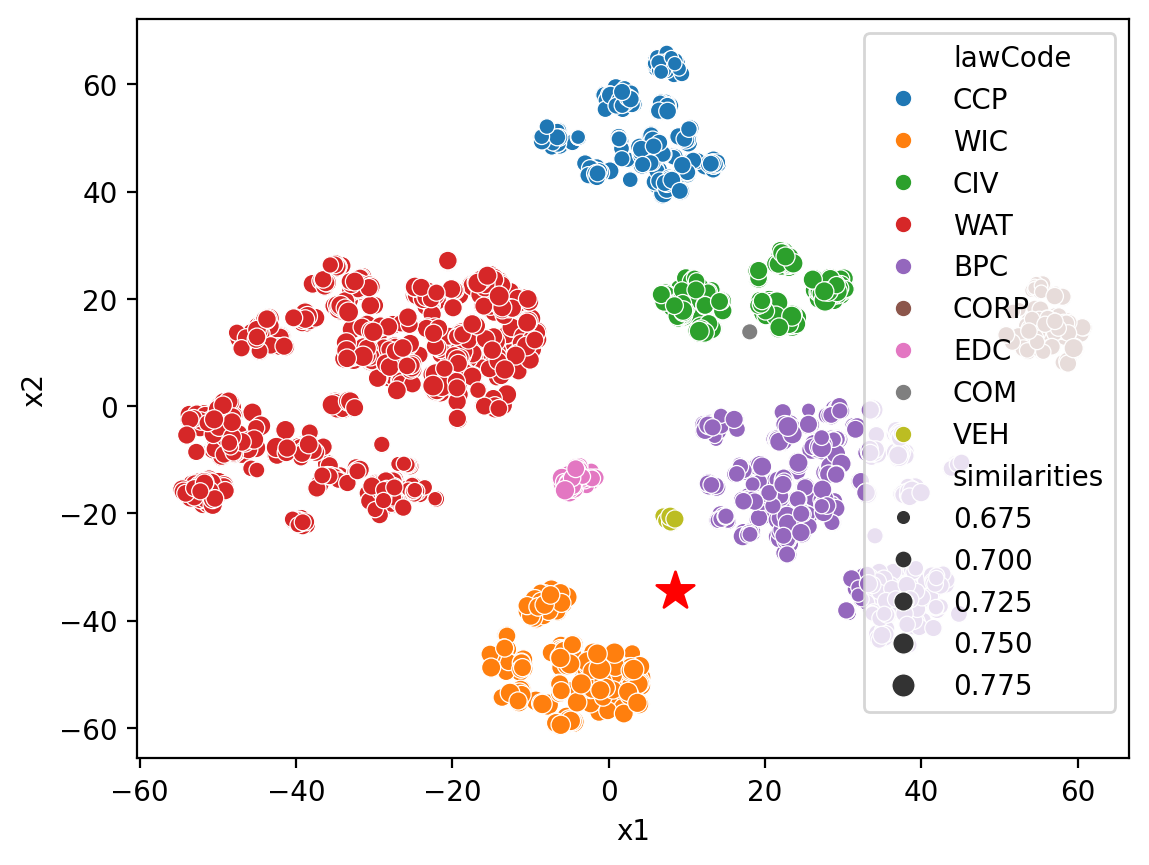

In [210]:
axes = sns.scatterplot(df, x='x1', y='x2', hue='lawCode', size='similarities')
plt.scatter(X_embedded[-1,0], X_embedded[-1,1], color='red', marker='*', s=200, zorder=5)

In [23]:
axes = sns.scatterplot?

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

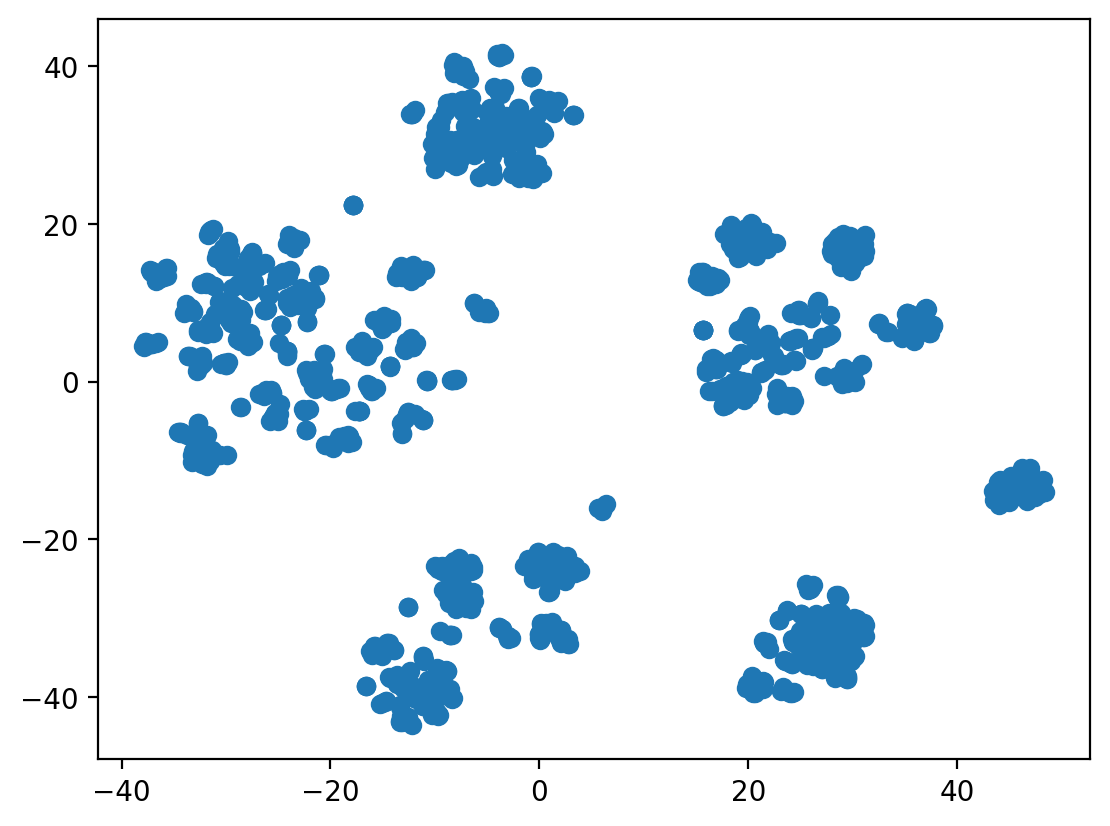

In [16]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [11]:
X_embedded.shape

(1497, 2)

In [21]:
len(X[:,0])

1497

In [97]:
similarities.squeeze()

array([0.72249641, 0.72496864, 0.76227332, ..., 0.71009867, 0.71706246,
       1.        ])